<a href="https://colab.research.google.com/github/robinmbstu12/MNIST_ANN/blob/master/MNIST_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# import module 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

import keras
from keras.datasets import mnist
from keras.models import Sequential 

from keras.layers import Dense


In [4]:
#DataSet
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape, x_test.shape 

((60000, 28, 28), (10000, 28, 28))

Actual Label:  0


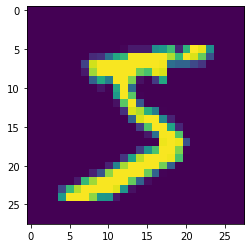

In [6]:
# plot image 
plt.imshow(x_train[0])

print("Actual Label: ",y_train[1])

In [7]:
# prepare dataset
x_train = x_train.reshape(60000,28*28)
x_test = x_test.reshape(10000,28*28) 

In [8]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [9]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


#normalize 

x_train = x_train/255
x_test  = x_test/255


In [11]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [12]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:

y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
#one hot encoding vector
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)


In [16]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [17]:
# create ANN 
model = Sequential()

#input layer
model.add(Dense(128,activation='relu',input_shape = {784,}))

#hidden layer
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))

#output layer
model.add(Dense(10,activation='softmax'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [19]:
adam = keras.optimizers.Adam(lr=0.0001)


In [20]:
#loss 
model.compile(loss = keras.losses.categorical_crossentropy,optimizer =adam, 
              metrics= ['accuracy'])


In [21]:
history = model.fit(x_train,y_train,
          batch_size = 128,
          epochs = 12,
          verbose = 1,
          validation_data = (x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 3s 46us/step - loss: 1.0447 - accuracy: 0.7151 - val_loss: 0.4037 - val_accuracy: 0.8964
Epoch 2/12
60000/60000 [==============================] - 2s 39us/step - loss: 0.3428 - accuracy: 0.9060 - val_loss: 0.2818 - val_accuracy: 0.9181
Epoch 3/12
60000/60000 [==============================] - 2s 40us/step - loss: 0.2618 - accuracy: 0.9271 - val_loss: 0.2303 - val_accuracy: 0.9339
Epoch 4/12
60000/60000 [==============================] - 2s 38us/step - loss: 0.2211 - accuracy: 0.9382 - val_loss: 0.2031 - val_accuracy: 0.9391
Epoch 5/12
60000/60000 [==============================] - 2s 39us/step - loss: 0.1933 - accuracy: 0.9456 - val_loss: 0.1806 - val_accuracy: 0.9485
Epoch 6/12
60000/60000 [==============================] - 2s 36us/step - loss: 0.1729 - accuracy: 0.9514 - val_loss: 0.1678 - val_accuracy: 0.9486
Epoch 7/12
60000/60000 [==============================] - 2s 36us/st

In [23]:
model.save("./model.h5")

In [24]:
test_data = x_test[0]
print(test_data.shape)
test_data = test_data.reshape(1,784)
test_data.shape

(784,)


(1, 784)

In [25]:
#predict 

pred = model.predict(test_data)

In [26]:
pred

array([[6.26819883e-06, 1.32363093e-05, 3.36884812e-04, 1.19459559e-03,
        1.04174546e-07, 2.84875496e-05, 2.31407611e-07, 9.98395264e-01,
        2.04066100e-06, 2.27874716e-05]], dtype=float32)

In [27]:
pred = np.argmax(pred,axis =1)

In [28]:
pred

array([7])

In [29]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)